<a href="https://colab.research.google.com/github/Yung-Huei/Python/blob/main/PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A Sample Torch Code

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# Define a simple neural network
class Net(nn.Module): # nn.Module 是父類別; 子類別不用重寫父類別已經有的功能
  def __init__(self):
    super(Net,self).__init__() #呼叫父類別並正確使用父類別的功能
                  #參數註冊（可以自動找出模型裡的參數）
                  #.to() 方法（把模型搬到 GPU）
                  #.eval() 和 .train() 模式切換
                  #.state_dict() 和 .load_state_dict() 儲存／讀取模型參數
    self.fc1=nn.Linear(320,50) #全連接層
    self.fc2=nn.Linear(50,10)

  def forward(self,x): #PyTorch 就會知道如何做前向傳播。
    x=F.relu(self.fc1(x))
    x=F.dropout(x)
    x=self.fc2(x)
    return F.log_softmax(x)
# creat an instance of the network
net=Net()

In [ ]:
#data loading
train_loader = torch.utils.data.DataLoader(train_data, batch_size=10, shuffle=True)
#defin a loss function and optimizer
criterion=nn.CrossEntropyLoss() #會自動做softmax+log+NLL; loss: e.g., nn.MSELoss,nn.CrossEntropyLoss
optimizer=optim.SGD(net.parameters(),lr=0.001) #將net參數傳給optim; e.g., optim.SGD or torch.optim.Adam
#training loop
for epoch in range(10):
  for inputs, targets in train_loader: #e.g., image, label
    optimizer.zero_grad() #清除上一個 batch 的梯度，避免梯度累加錯誤
    outputs=net(inputs)
    loss=criterion(outputs,targets)
    loss.backward() #根據 loss 對模型參數計算「梯度」
    optimizer.step() #使用梯度更新參數

# testing loop
net.eval()  # 切換成 eval 模式（停用 dropout、batchnorm）
with torch.no_grad():  # 不儲存梯度（加快速度）;不記錄計算圖（節省記憶體）
    for inputs, targets in test_loader:
        outputs = net(inputs) #在tensor計算時會儲存計算圖和梯度為了後續backward，故需要torch.no_grad()
        # 可以加上評估準確率的程式碼，例如：
        # predicted = outputs.argmax(dim=1)
        # correct += (predicted == targets).sum().item()


**Datasets**

*   The Dataset class allows you to define how data samples are accessed and prepared.
*   Custom datasets can be implemented by subclassing torch.utils.data.Dataset and defining__getitem__and__len__methods.
*   Built-in Datasets: PyTorch provides ready-to-use datasets such as MNIST and CIFAR-10 through torchvision.datasets.

**DataLoader**

*   Combines datasets into batches, shuffles data, and handles multiprocessing for loading data efficiently.


In [ ]:
# Loading FashionMNIST
from torchvision import datasets
from torchvision.transforms import ToTensor
training_data = datasets.FashionMNIST(
    root="data", #下載存放在data資料夾中
    train=True,  #載入訓練資料集，反之，測試集
    download=True, #如果 data/ 裡面還沒有這個資料集，會自動從網路上下載。
    transform=ToTensor() #每張圖會先轉成 PyTorch tensor 格式
)
print(len(training_data)) #是物件所以使用len非.size
import torch
labels = training_data.targets  # 是一個 Tensor
print(torch.unique(labels))     # 看有哪些類別
print(f"共有 {len(torch.unique(labels))} 種 label")


60000
tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
共有 10 種 label


Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


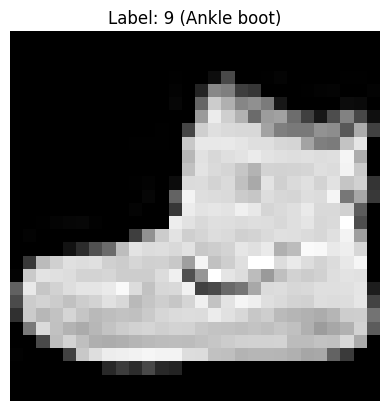

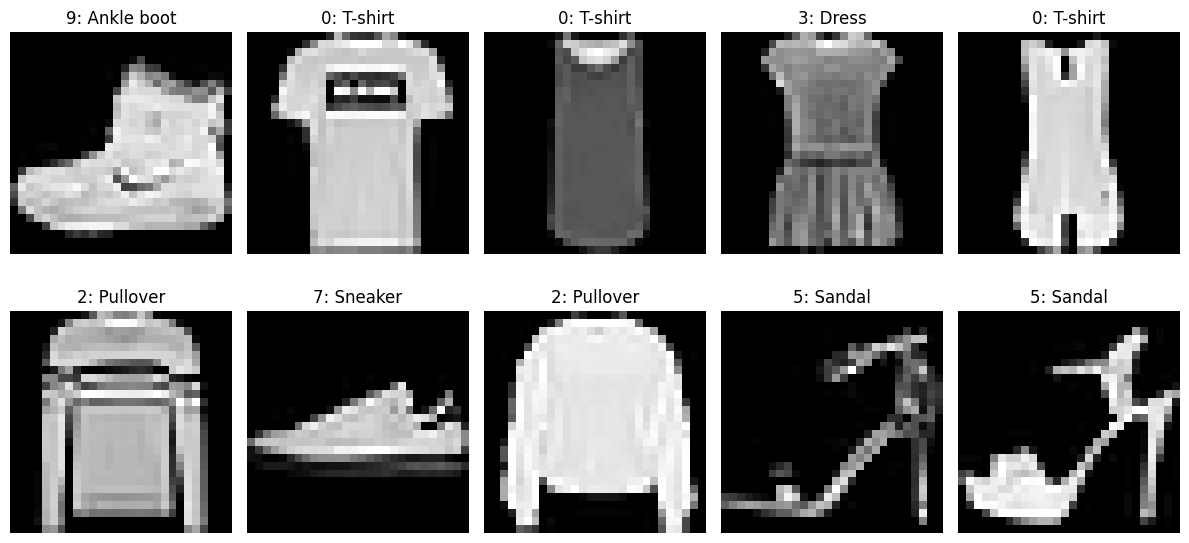

In [ ]:
from torch.utils.data import DataLoader
train_dataloader=DataLoader(training_data,batch_size=64,shuffle=True) #批次資料載入器（DataLoader）
train_features,train_labels=next(iter(train_dataloader)) #透過 iter() 得到的物件，可以用 next() 一筆一筆拿資料
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")

#視覺化
import matplotlib.pyplot as plt

# 1. 取出第 n 張圖（例如第 0 張）
image, label = training_data[0]

# 2. 把張量轉成圖像來顯示
plt.imshow(image.squeeze(), cmap="gray")
class_names = ["T-shirt", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

plt.title(f"Label: {label} ({class_names[label]})")
plt.axis("off")
plt.show()

# 一次畫多張圖
plt.figure(figsize=(12, 6))  # 設定畫布大小 寬12inch and 高6inch
for i in range(10):
    image, label = training_data[i]
    image = image.squeeze()  # 去掉通道維度 [1,28,28] → [28,28]

    plt.subplot(2, 5, i + 1)  # 2列5欄的子圖，第i+1個
    plt.imshow(image, cmap="gray")
    plt.title(f"{label}: {class_names[label]}")
    plt.axis("off") #不要坐標軸

plt.tight_layout() #自動調整子圖間距
plt.show()



In [ ]:
# Network Structure
class NeuralNetwork(nn.Module): #定義一個神經網路類別，繼承自 PyTorch 的基礎模組 nn.Module
  def __init__(self):
    super().__init__() #初始化網路結構，這裡定義了網路有哪些層（Layer）
    self.flatten=nn.Flatten() #[batch_size, channels, height, width]）轉換成：[batch_size, channels × height × width]
    self.linear_relu_stack=nn.Seqeuntial(
        nn.Linear(28*28,512), # nn.Linear, nn.Conv2d, nn.LSTM
        nn.ReLU(),      # ReLU, Sigmoid, and Tanh
        nn.Linear(512,512),
        nn.ReLU(),
        nn.Linear(512,10)
    )
  def forward(self,x):
    x=self.flatten(x)
    logits=self.linear_relu_stack(x)
    return logits

# Instantizeand send weights to GPU
#device='cuda' if torch.cuda.is_available() else 'cpu'
model=NeuralNetwork().to(device)
X=torch.rand(1,28,28,device=device)
logits=model(X)


In [ ]:
# Auto-differentiation (Pytorch has a built-in engine called autograd for calculating gradients.)
x=torch.ones(5) #列向量
y=torch.zeros(3)
w=torch.randn(5,3,requires_grad=True) # When you use backward to calculate the grad,
                  # pytorch calculates the gradient of each component that requires_grad and store it.
print(x.shape)
print(w.shape)
b=torch.randn(3,requires_grad=True)
z=torch.matmul(x,w)+b
loss=torch.nn.functional.binary_cross_entropy_with_logits(z,y)

torch.Size([5])
torch.Size([5, 3])


In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')
#%cd /content/drive/MyDrive

#!git clone https://github.com/RunpengDai/ICSA_DLcourse.git
!git clone https://github.com/RunpengDai/BIOS740.git


Cloning into 'BIOS740'...
remote: Enumerating objects: 405, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 405 (delta 2), reused 1 (delta 1), pack-reused 399 (from 2)
Receiving objects: 100% (405/405), 306.13 MiB | 13.30 MiB/s, done.
Resolving deltas: 100% (105/105), done.
Updating files: 100% (145/145), done.


In [ ]:
# Loss function
# Binary Cross Entropy function (BCE)
predictions = torch.sigmoid(torch.randn(4))
labels = torch.tensor([1, 0, 1, 0], dtype=torch.float32)
criterion = nn.BCELoss()
loss = criterion(predictions, labels)

# Cross Entropy Loss
predictions = torch.randn(4, 5)
labels = torch.tensor([1, 0, 3, 2], dtype=torch.long) # Should contain the class indices (not one-hot encoded) and should be of type torch.long
# softmax_predictions = torch.softmax(predictions, dim=1) # 對每一列執行 softmax
criterion = nn.CrossEntropyLoss()
loss = criterion(predictions, labels)

# KL divergence
predicted_log_probs = torch.log_softmax(torch.randn(4, 5), dim=1) # log
true_probs = torch.softmax(torch.randn(4, 5), dim=1) # no log
criterion = nn.KLDivLoss(reduction='batchmean') # 除以 batch size; controls how the individual loss values in a batch are combined into a single scalar loss value.(none/ mean/ sum)
loss = criterion(predicted_log_probs, true_probs)

# NLL Loss
log_probs = torch.log_softmax(torch.randn(4, 5), dim=1)
labels = torch.tensor([1, 0, 3, 2]) # Class labels for each sample
criterion = nn.NLLLoss()
loss = criterion(log_probs, labels)

In [ ]:
import torch
def corr2d(X, K):
"""Compute 2D cross-correlation."""
h, w = K.shape
Y = torch.zeros((X.shape[0] - h + 1, X.shape[1] - w + 1))
for i in range(Y.shape[0]):
for j in range(Y.shape[1]):
Y[i, j] = (X[i:i + h, j:j + w] * K).sum()
return Y